In [1]:
import sys
sys.path.append("../")
import os
import json
import numpy as np
import matplotlib.pyplot as plt

import settings
from process_sentinel3 import OLCIdata, OLCIdataGenerator

In [2]:
DATA_PATH = settings.processed_data_path
DATE_FORMAT = '%Y-%m-%d'
START_DATE = '2019-12-21'
END_DATE = '2020-03-21'

#contorno interno lat/lon
INTERNAL_CONTOUR = [[-34.85044049, -55.05341557], [-34.85254593, -55.06282895], [-34.84523452, -55.07215948], 
                    [-34.84214073, -55.08336897], [-34.83733203, -55.08595825], [-34.830501, -55.07932854], 
                    [-34.82322889, -55.07377278], [-34.81443658, -55.06745663], [-34.80518264, -55.06063834], 
                   [-34.79828906, -55.05565486], [-34.79200075, -55.04700809], [-34.80233605, -55.04418996],
                   [-34.81042967, -55.04493995], [-34.82011843, -55.04664643], [-34.82953074, -55.04855582],
                   [-34.83996726, -55.0500401], [-34.85044049, -55.05341557]]
# lon/lat
INTERNAL_CONTOUR_2 = [[coord[1], coord[0]] for coord in INTERNAL_CONTOUR]

# longitude, latitude
CONTROL_COORDS_lonlat = [[-55.05218561, -34.79350339], [-55.04275225, -34.80644736], [-55.06375682, -34.82126589],
                 [-55.04579698, -34.78860639], [-55.04796407, -34.81608362], [-55.0601278, -34.80807322],
                 [-55.05417706, -34.83326008], [-55.07680277, -34.8314941], [-55.05205109, -34.84231436],
                 [-55.05205109, -34.84231436], [-55.05205109, -34.84231436], [-55.0683368, -34.8412471],
                 [-55.08815247, -34.83684142], [-55.08815247, -34.83684142], [-55.04217516, -34.79646286],
                 [-55.06439235, -34.83036737], [-55.07488051, -34.81978377], [-55.07488051, -34.81978377],
                 [-55.05803691, -34.84653341], [-55.08188377, -34.84258836], [-55.08188377, -34.84258836],
                 [-55.06344332, -34.85348254]]
# latitude, longitude
CONTROL_COORDS = [[coord[1], coord[0]] for coord in CONTROL_COORDS_lonlat]

CYANO_GT_DAYS = ['2015-12-30', '2016-01-07', '2016-01-13', '2016-01-23', '2016-01-27',
 '2016-02-03', '2016-02-10', '2016-02-18', '2016-02-24', '2016-03-02',
 '2016-03-10', '2016-03-22', '2016-03-29', '2016-04-07', '2016-12-01',
 '2016-12-09', '2016-12-16', '2016-12-22', '2017-01-02', '2017-01-11',
 '2017-01-18', '2017-01-24', '2017-02-02', '2017-02-08', '2017-02-15',
 '2017-02-22', '2017-03-01', '2017-03-08', '2017-03-16', '2017-03-23',
 '2017-03-31', '2017-04-07', '2017-11-22', '2017-11-30', '2017-12-07',
 '2017-12-15', '2017-12-21', '2017-12-28', '2018-01-03', '2018-01-11',
 '2018-01-18', '2018-01-25', '2018-01-31', '2018-02-08', '2018-02-15',
 '2018-02-22', '2018-03-01', '2018-03-07', '2018-03-26', '2018-04-05',
 '2018-04-18', '2018-11-13', '2018-11-20', '2018-11-30', '2018-12-13',
 '2018-12-20', '2018-12-28', '2019-01-04', '2019-01-11', '2019-01-18',
 '2019-01-24', '2019-01-31', '2019-02-07', '2019-02-15', '2019-02-21',
 '2019-03-01', '2019-03-07', '2019-03-14', '2019-03-22', '2019-03-29',
 '2019-04-04', '2019-04-12', '2019-05-18', '2019-08-01', '2019-09-22',
 '2019-11-06', '2019-11-15', '2019-11-27', '2019-12-13', '2019-12-23',
 '2019-12-30', '2020-01-07', '2020-01-16', '2020-01-24', '2020-01-31',
 '2020-02-06', '2020-02-11', '2020-02-19', '2020-02-27', '2020-03-04',
 '2020-03-20', '2020-03-26', '2020-04-04', '2020-04-11', '2020-04-18',
 '2020-04-23', '2020-05-02', '2020-05-10']

### Tag image cloudiness

levels of cloud:

0) Clear

1) minimum clouds over the lake

2) medium amount of clouds

3) too cloudy to be any good

In [ ]:
from IPython.display import clear_output
import time

data_generator = OLCIdataGenerator(DATA_PATH, DATE_FORMAT, dates_list=CYANO_GT_DAYS, tagging=True)
retag = False

for day in data_generator:
    print(day.date)
    print(day.metadata)
    current_metadata = day.metadata
    if current_metadata != {} and not retag:
        time.sleep(0.1)
        clear_output(wait=True)
        continue
    # display rgb of day
    fig = plt.figure(figsize=(20,10))
    plt.imshow(day.rgb)
    plt.show()
    # get user input
    user_input = input()
    # overwrite with changes
    with open(day.metadata_path, 'w') as fp:
        current_metadata["cloud level"] = user_input
        json.dump(current_metadata, fp)
    clear_output(wait=True)

###  Generate and store images from every clear day

/home/ubuntu/anaconda3/envs/cyano_venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


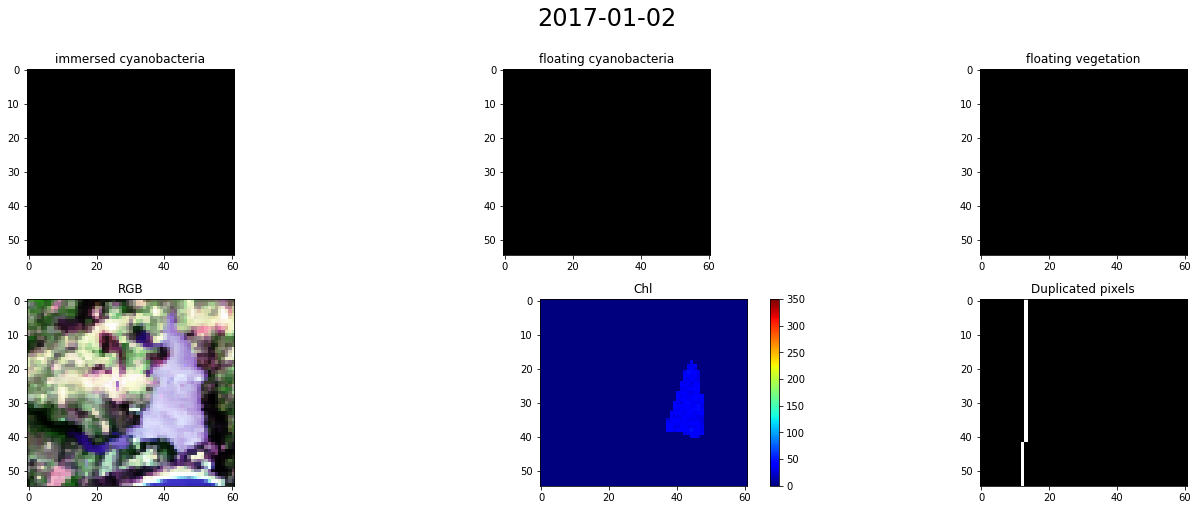

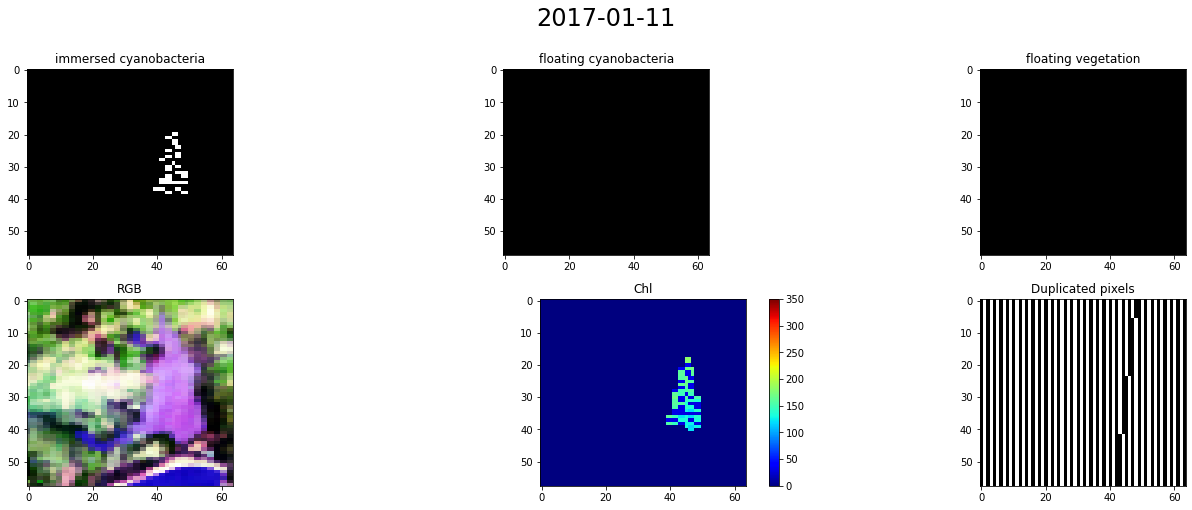

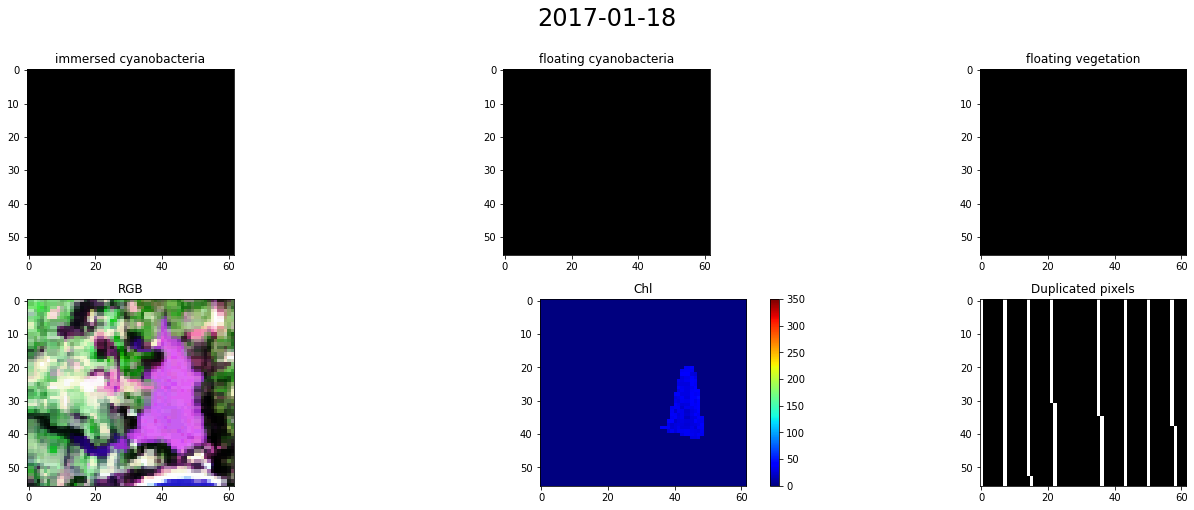

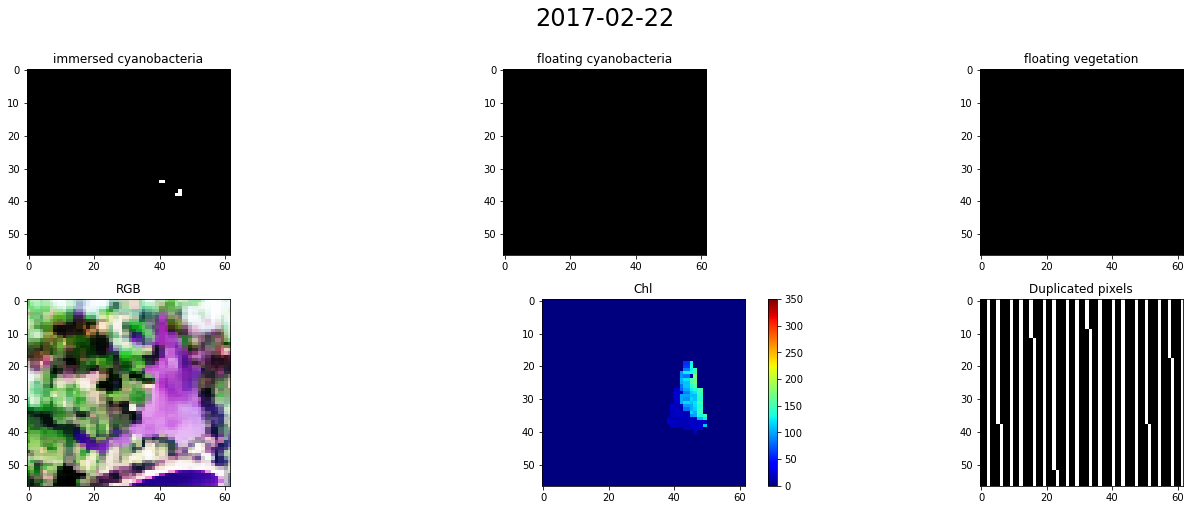

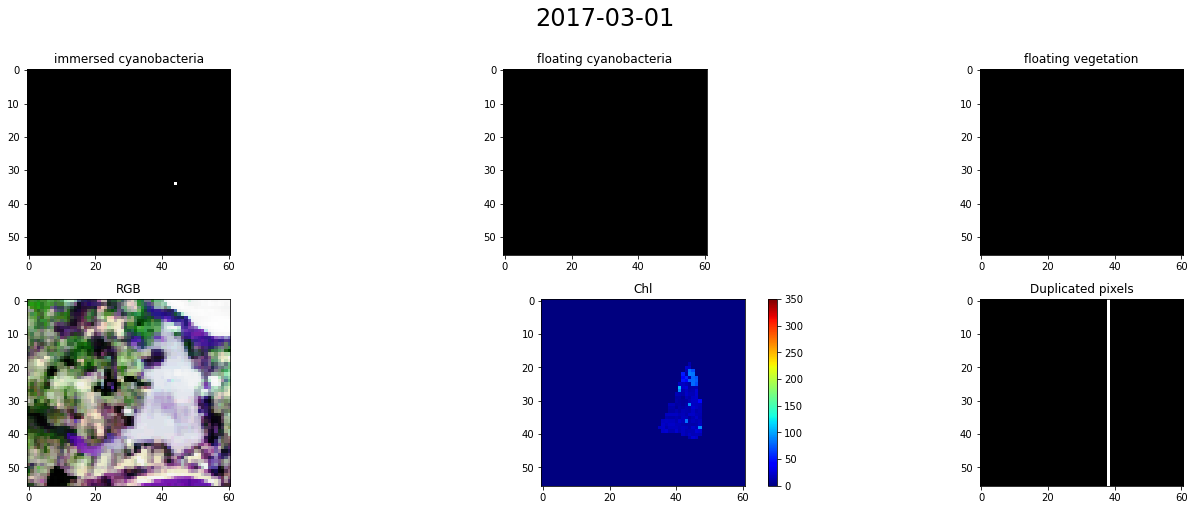

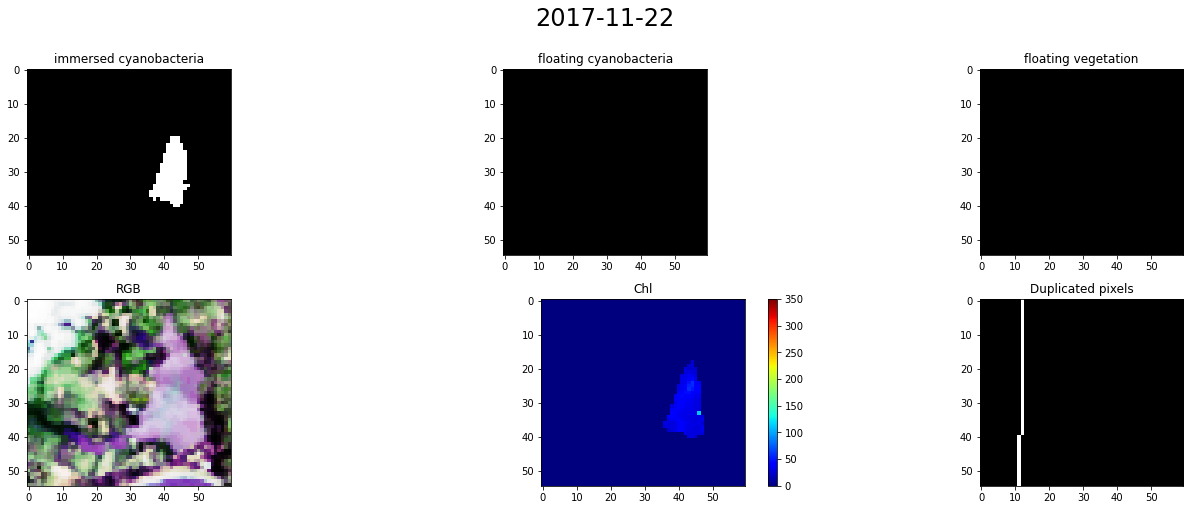

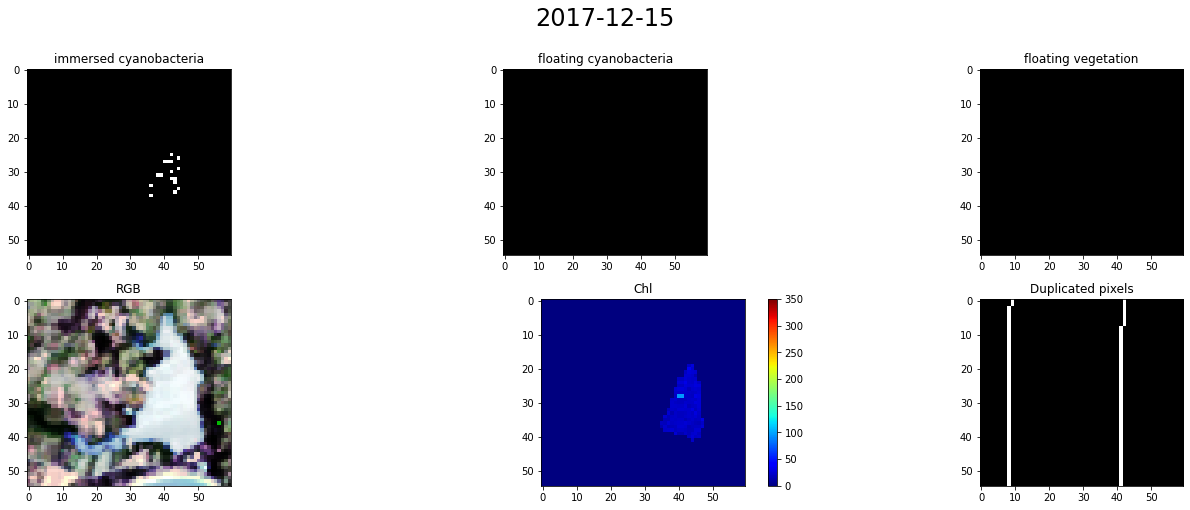

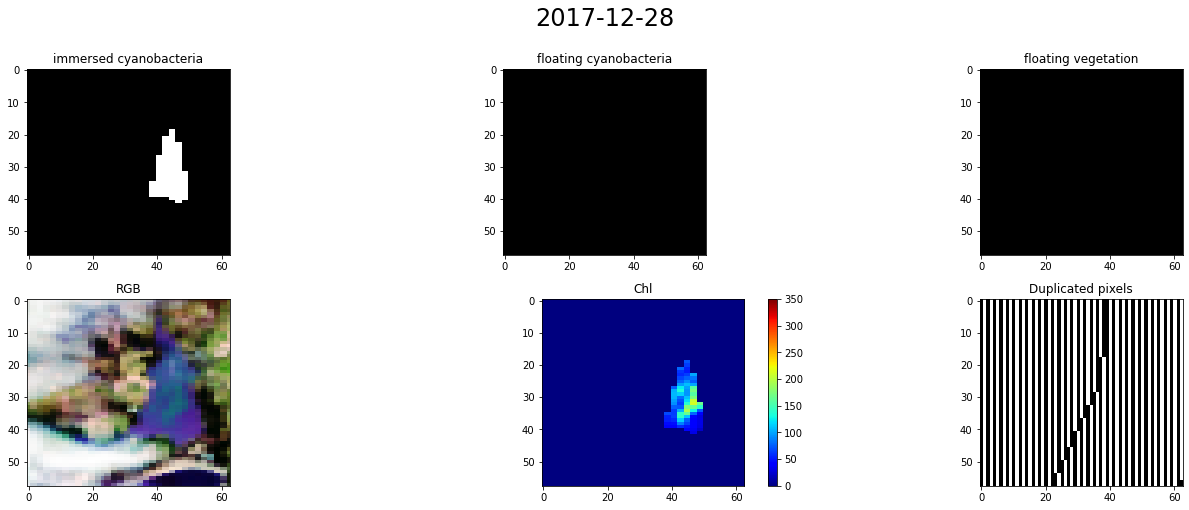

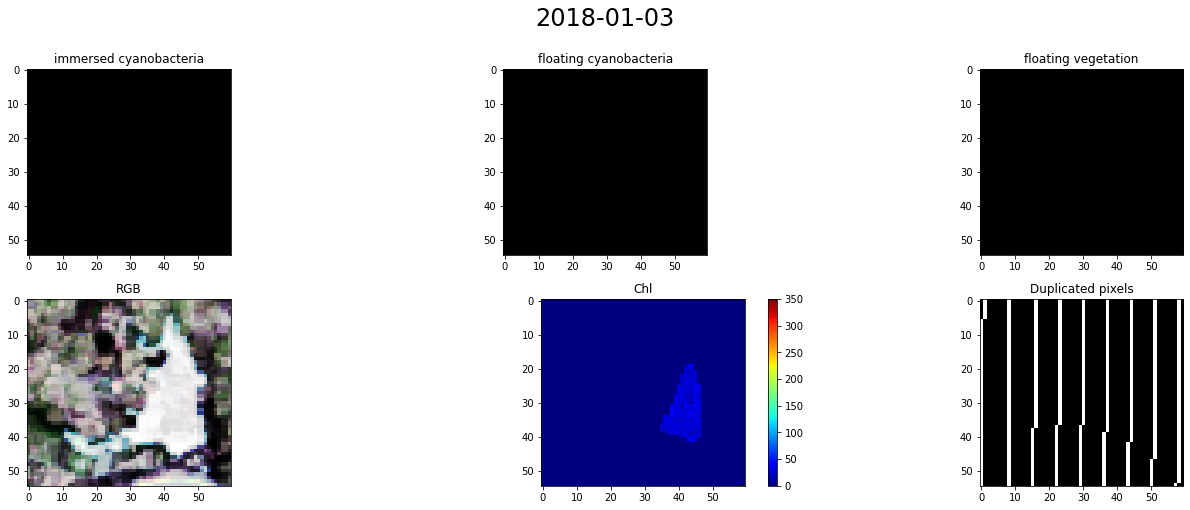

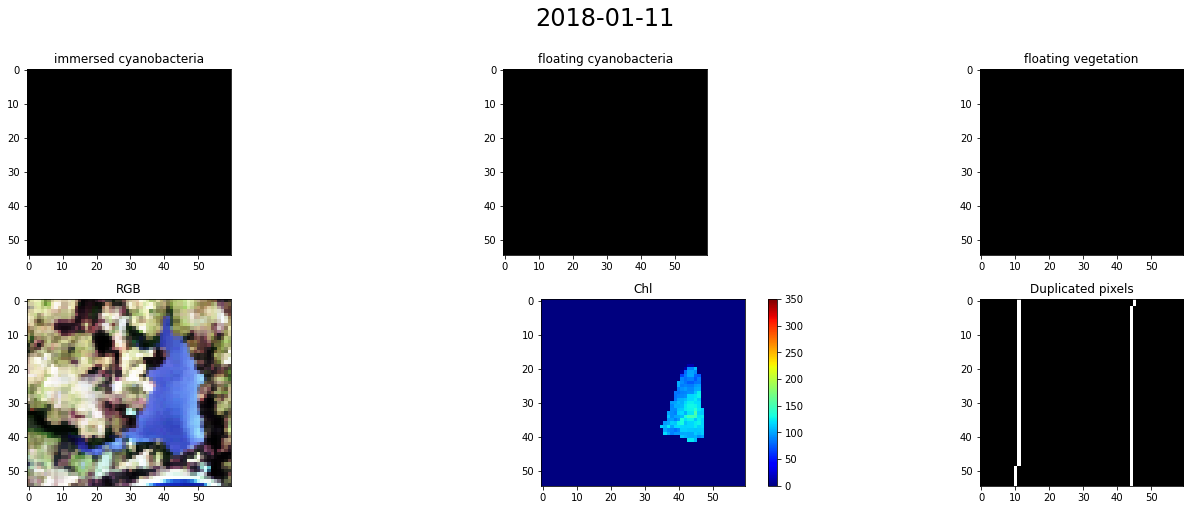

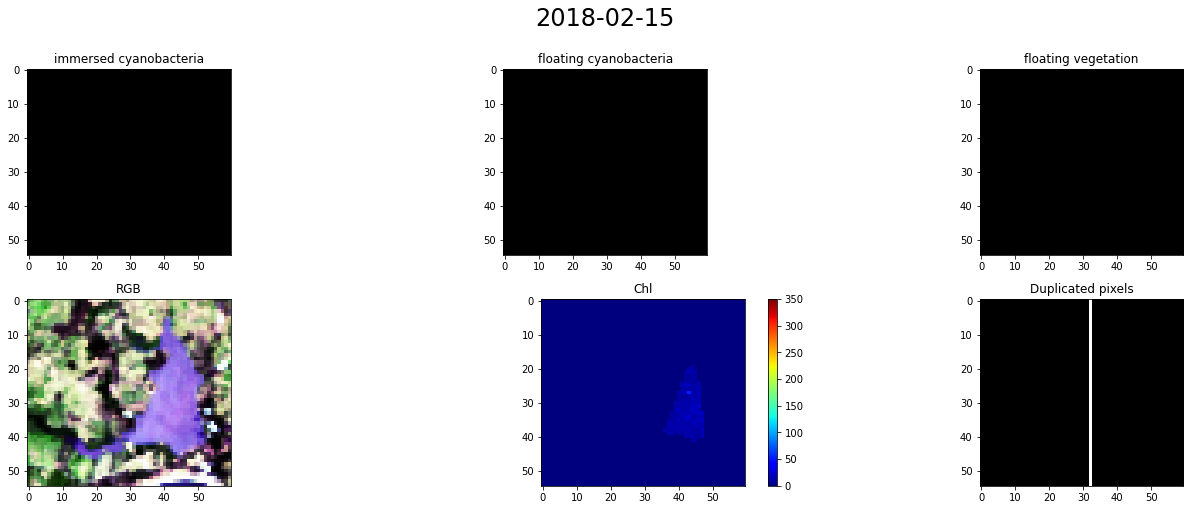

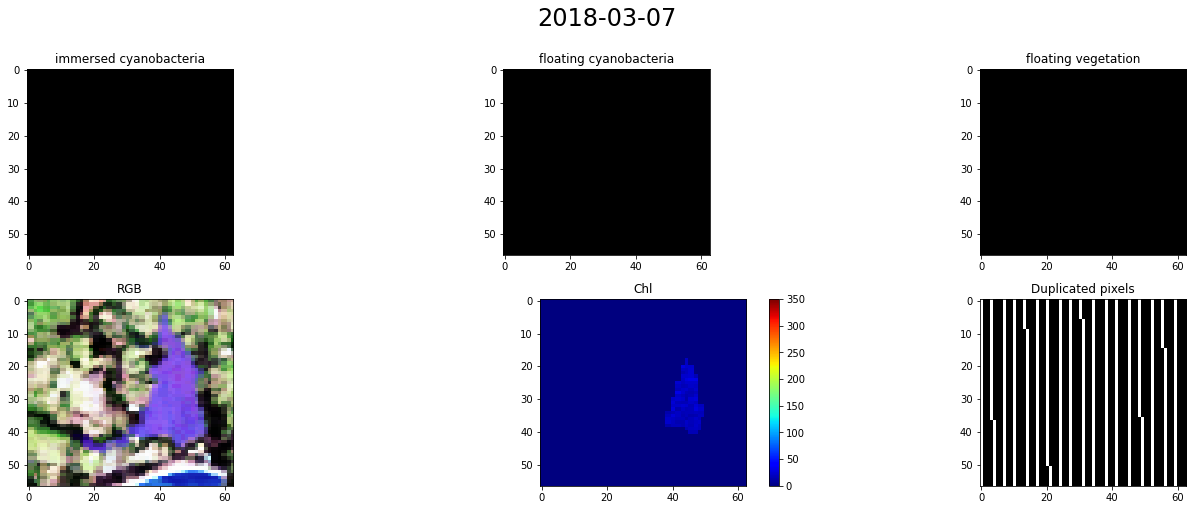

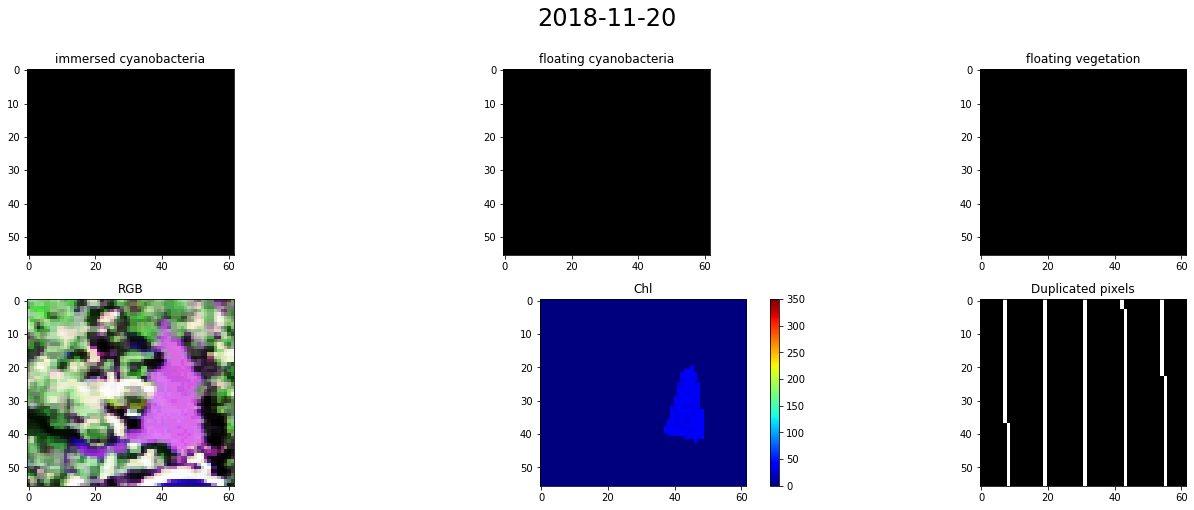

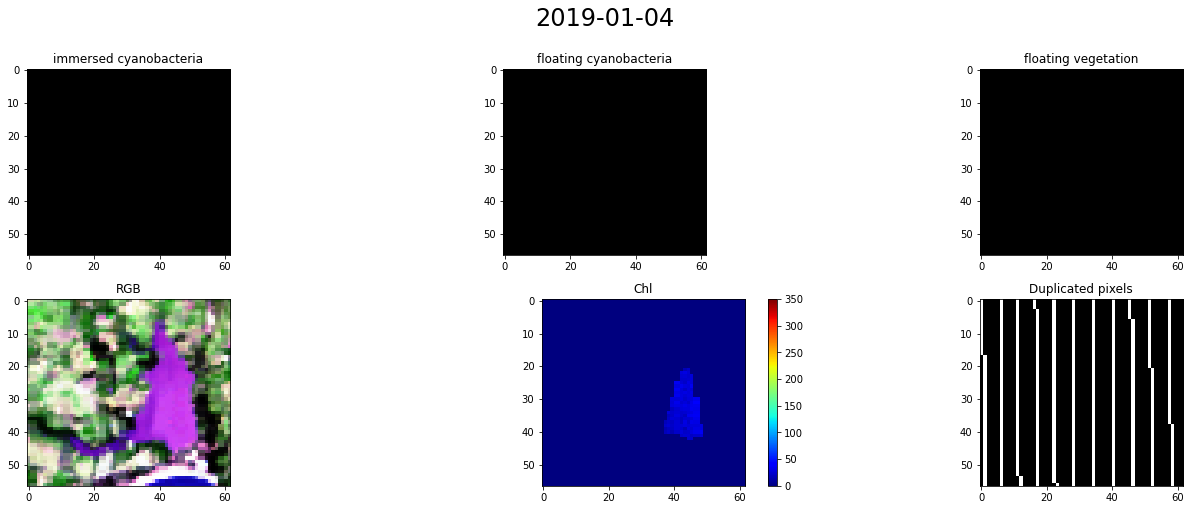

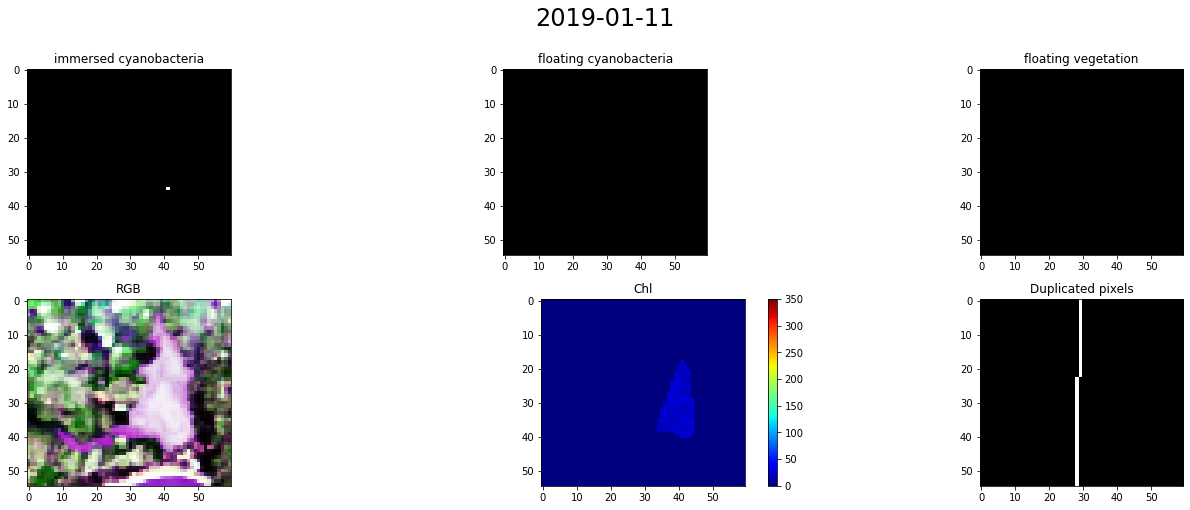

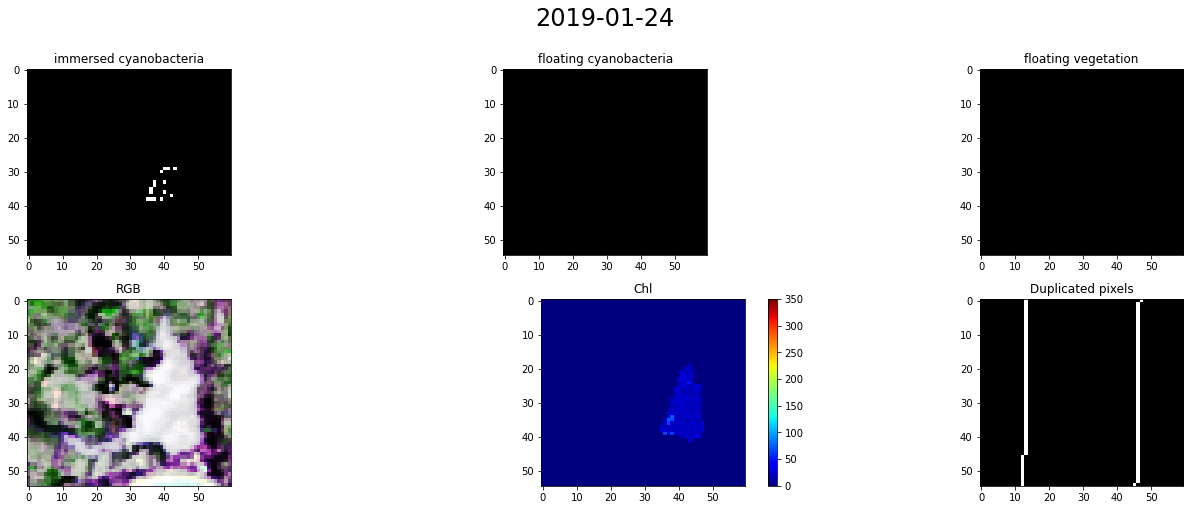

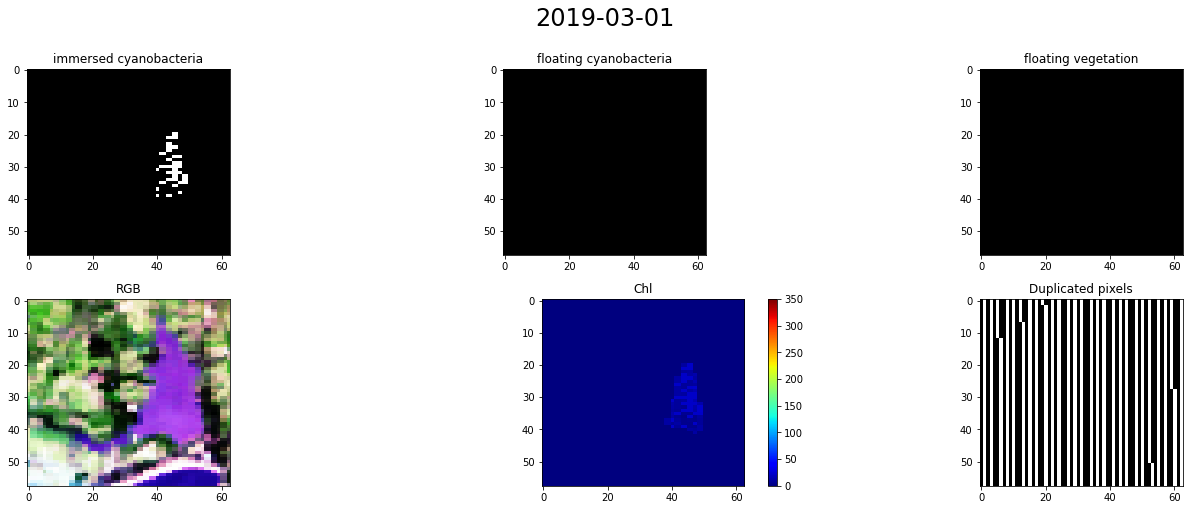

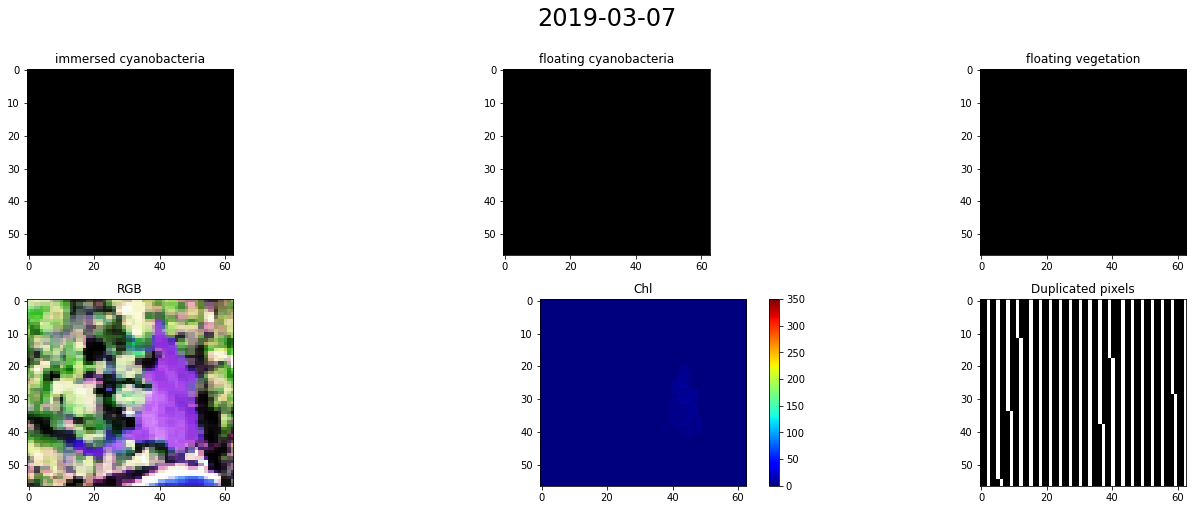

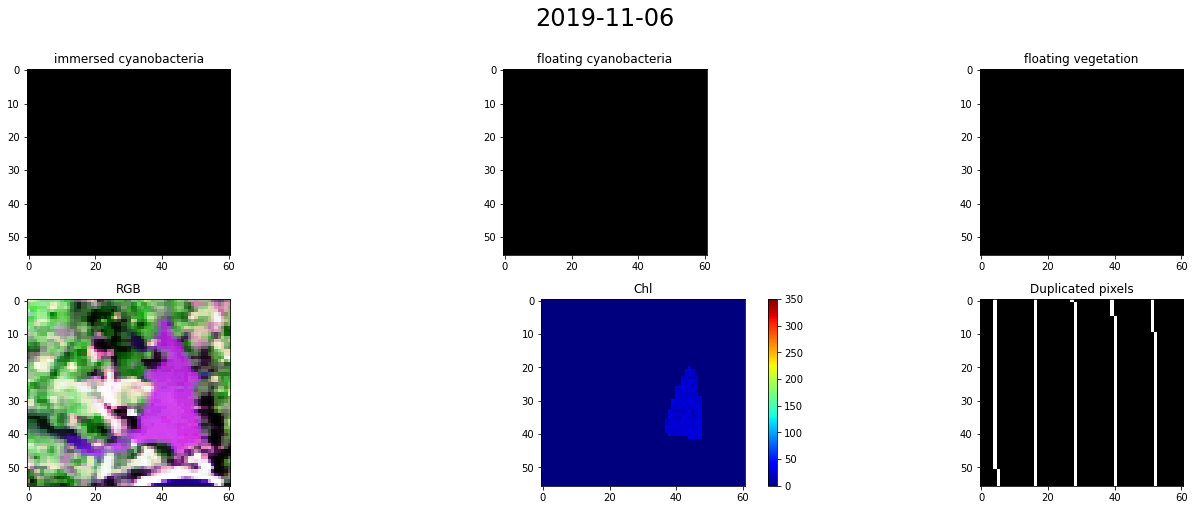

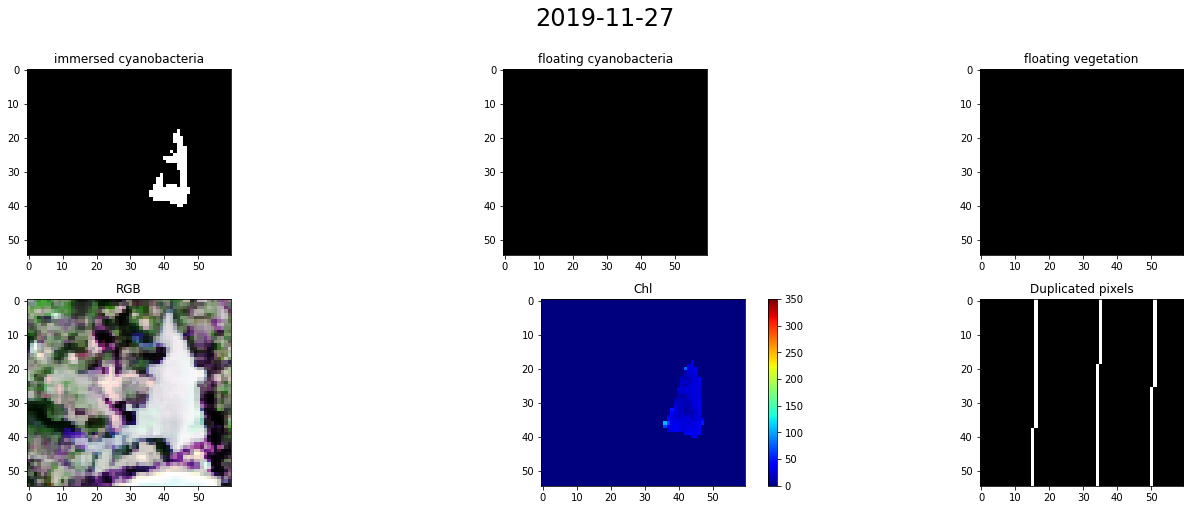

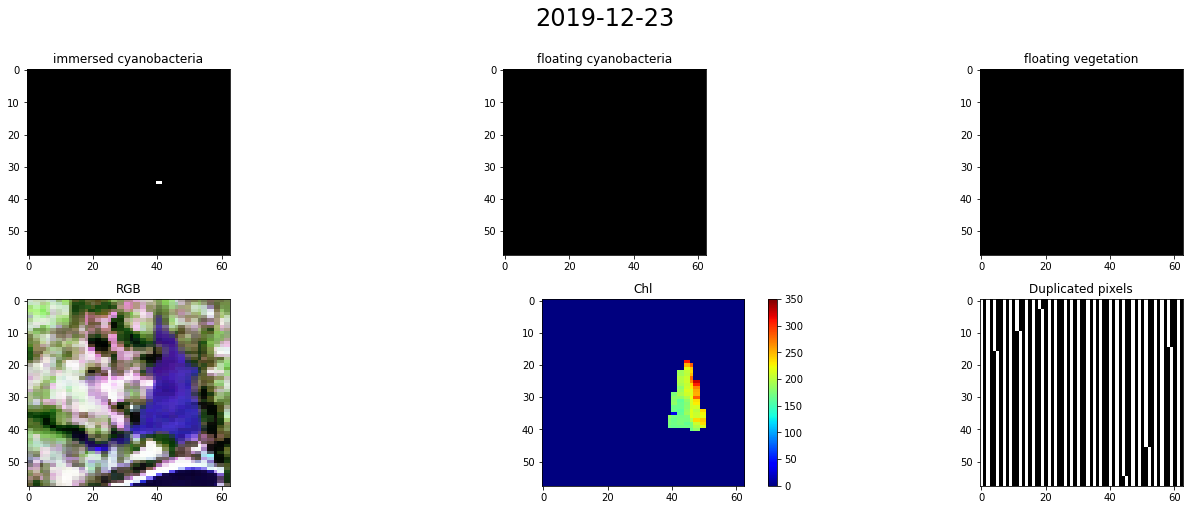

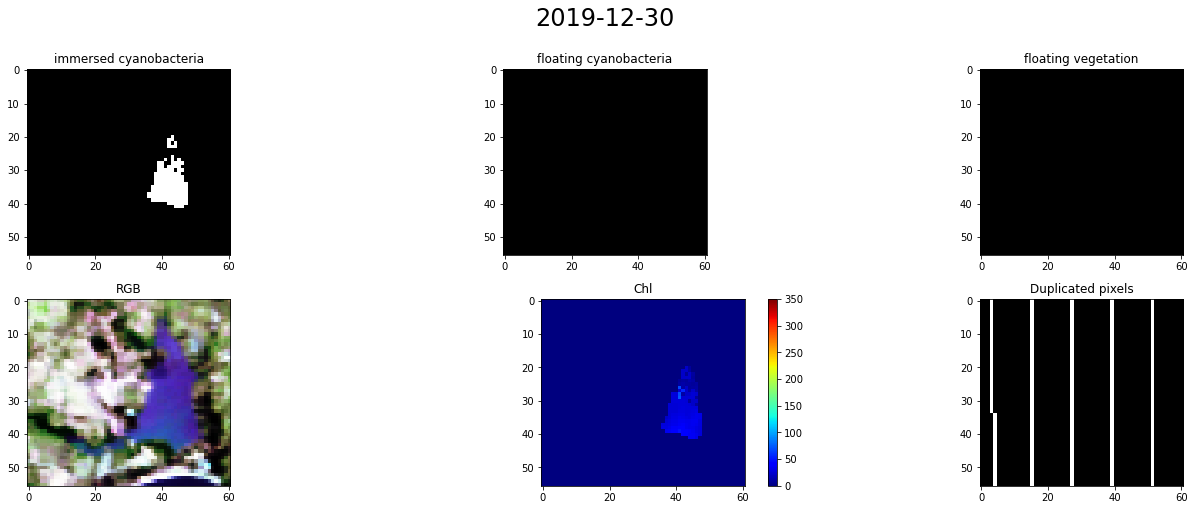

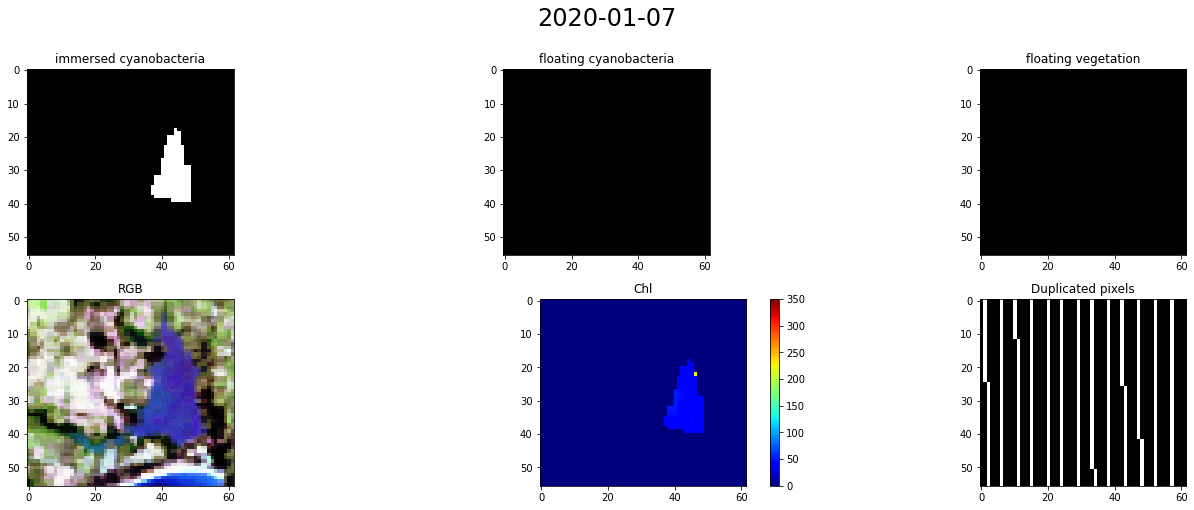

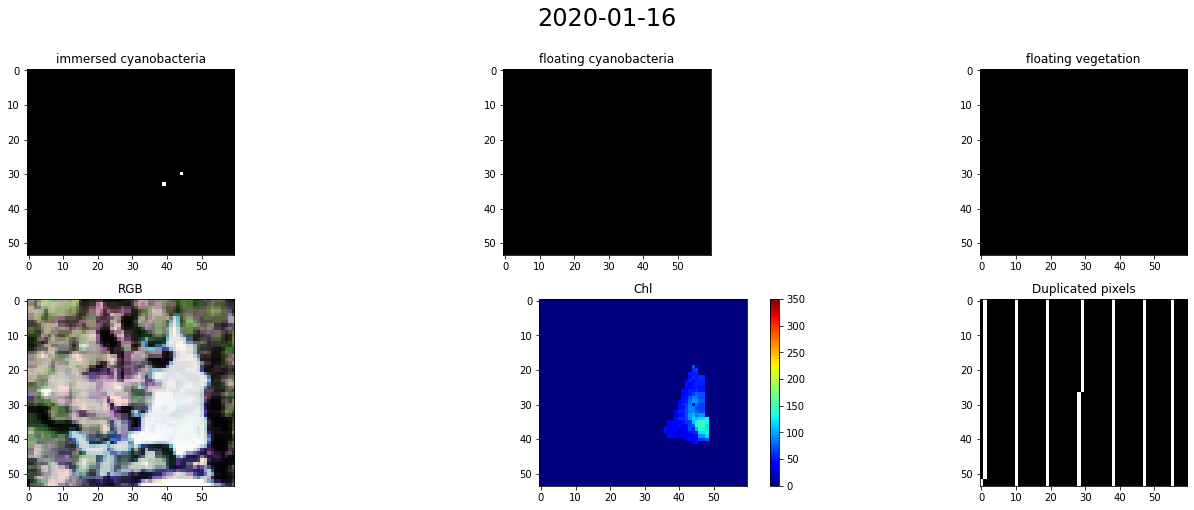

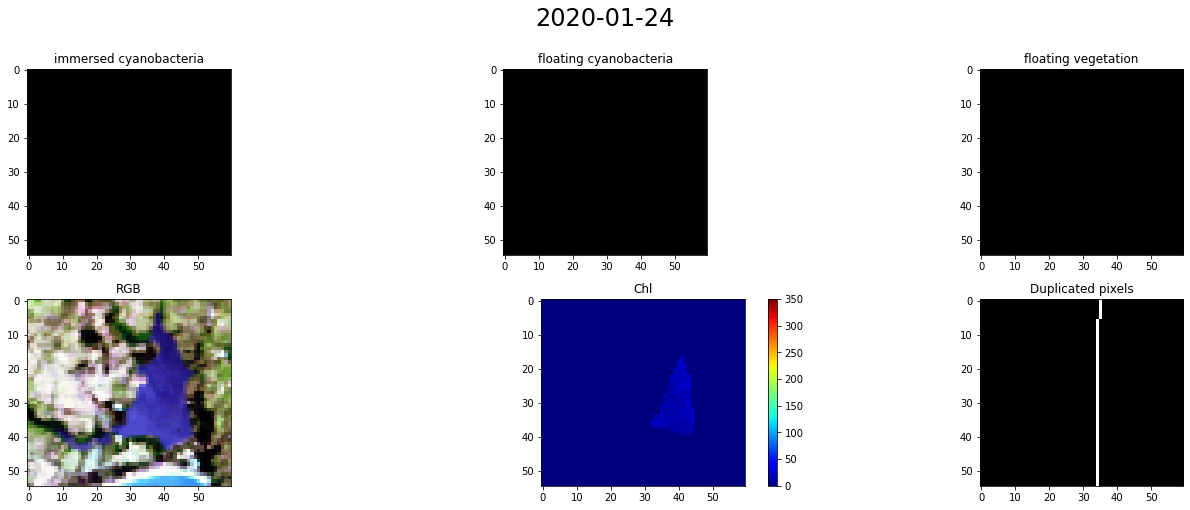

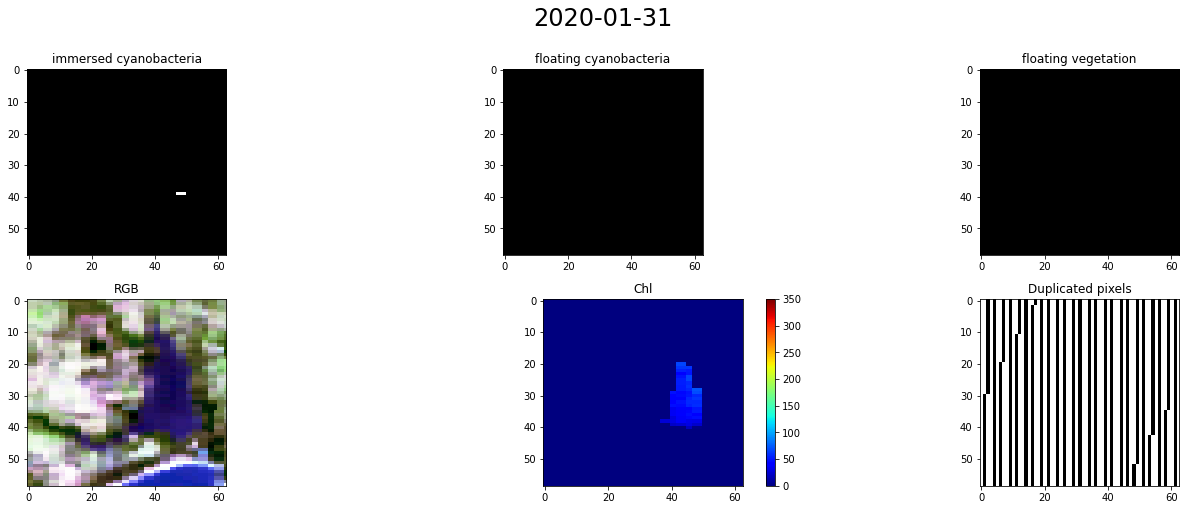

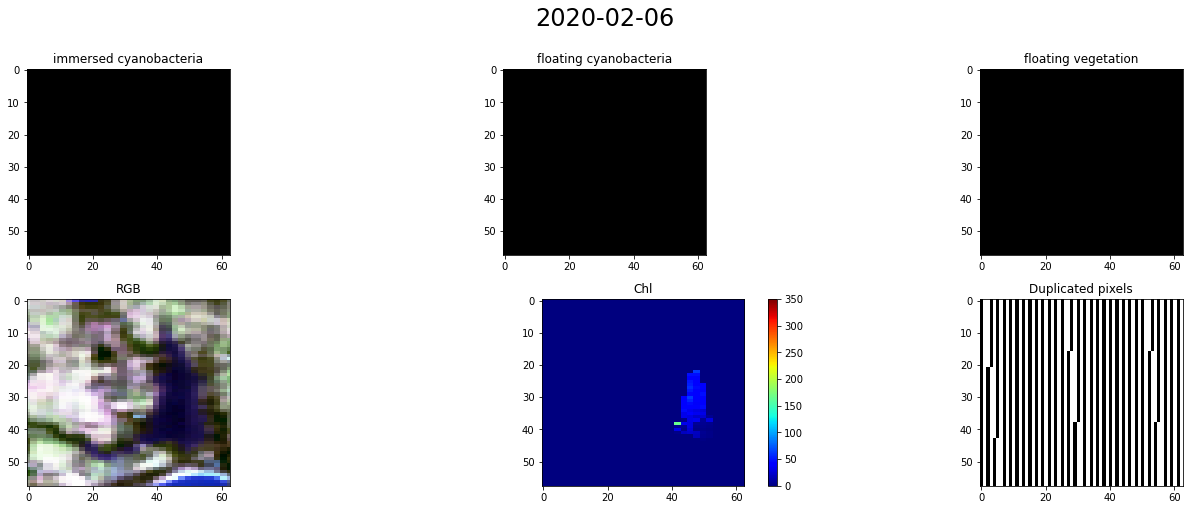

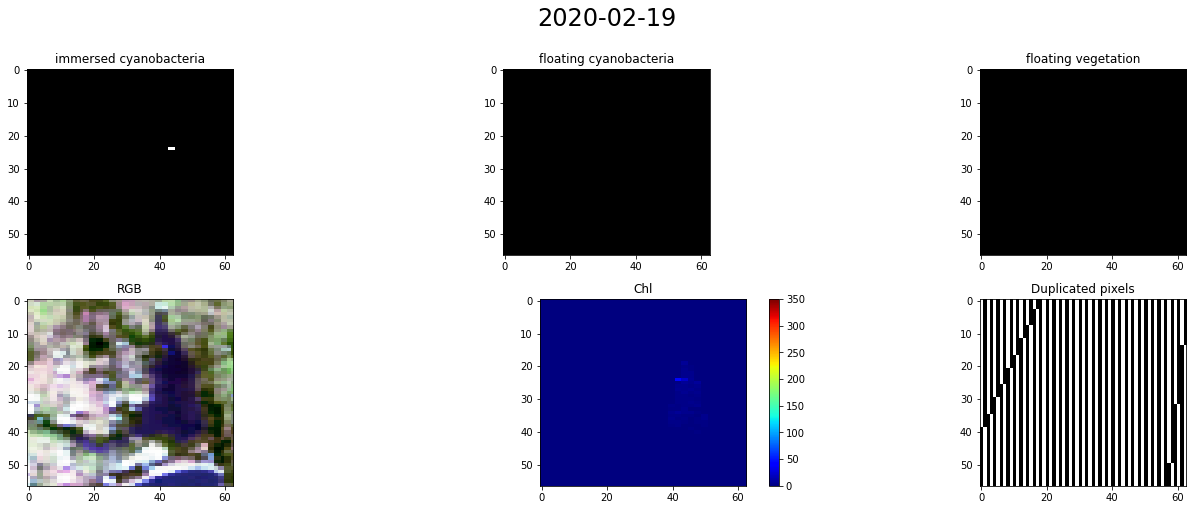

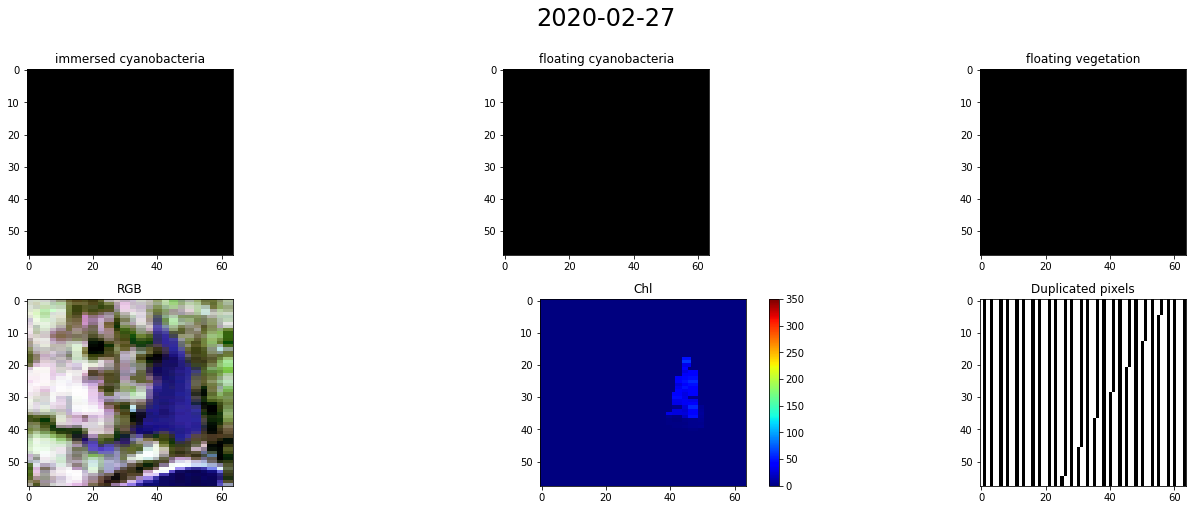

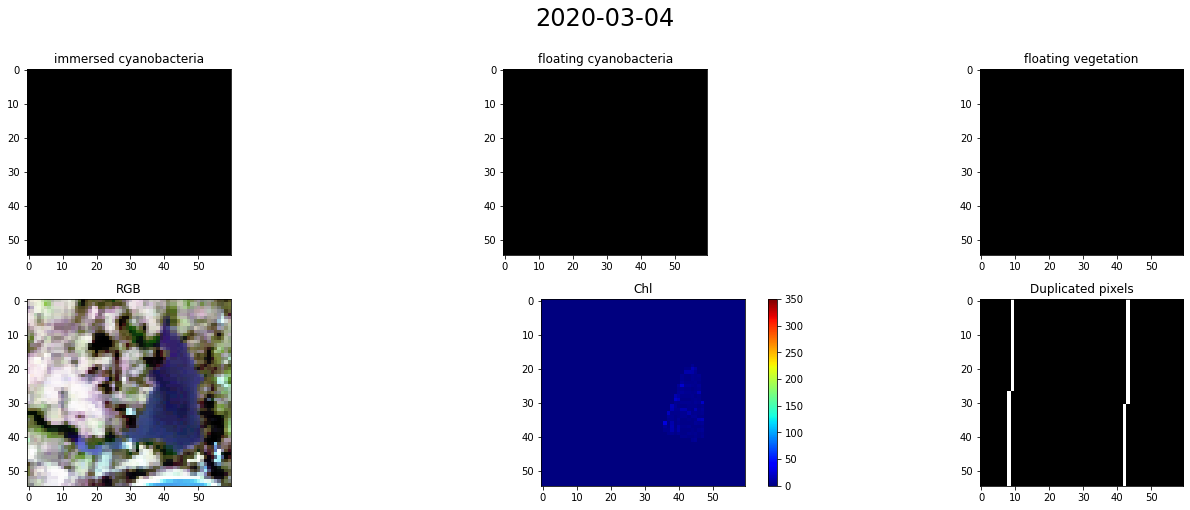

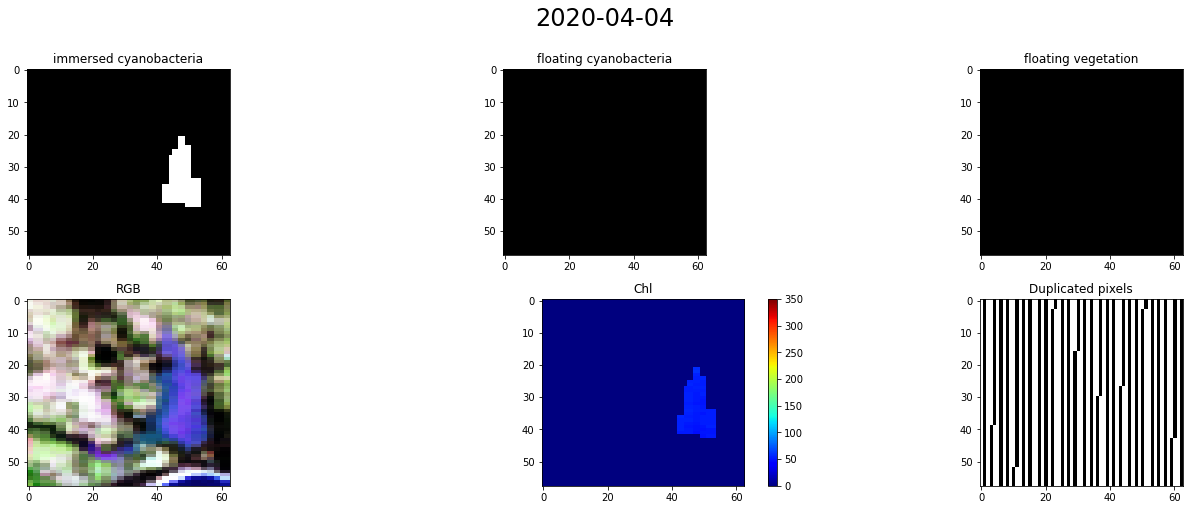

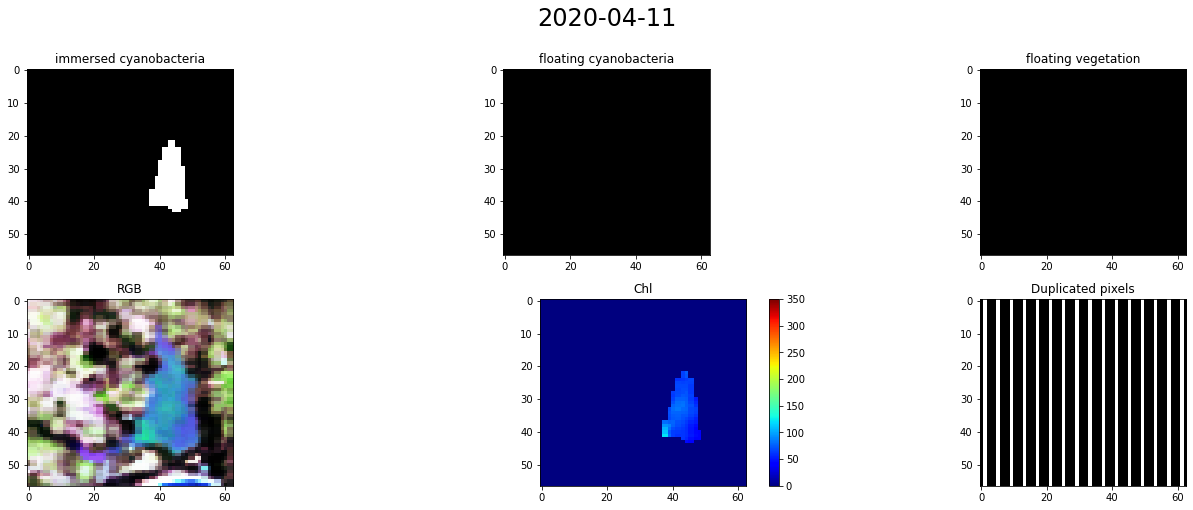

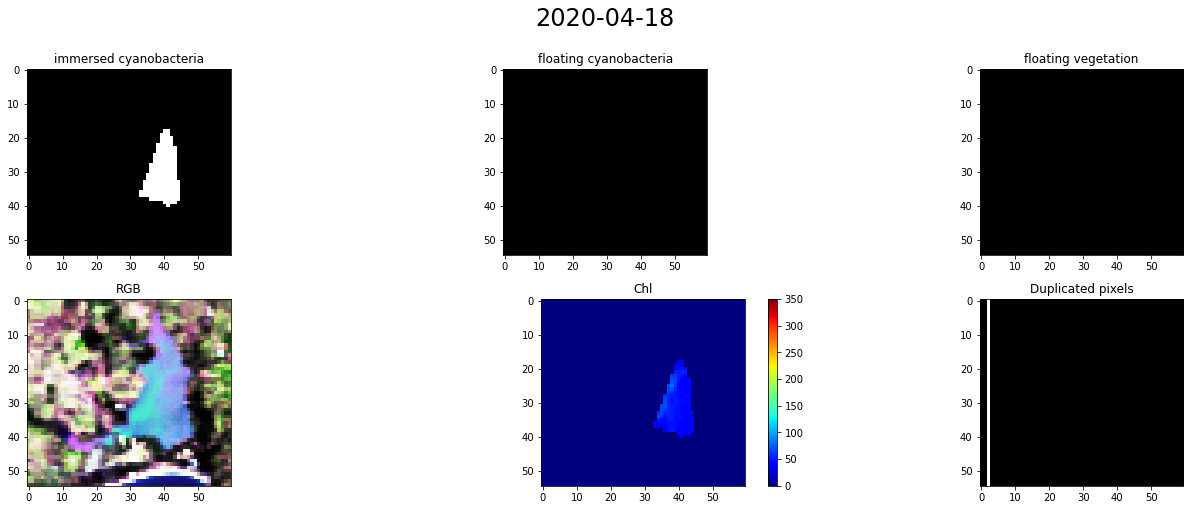

In [7]:
processed_dates = []
data_generator = OLCIdataGenerator(DATA_PATH, DATE_FORMAT, dates_list=CYANO_GT_DAYS, skip_invalid=True,
                                  mask_coordinates=INTERNAL_CONTOUR_2)
for day in data_generator:
    fig2 = plt.figure(figsize=(20,10))
    
    fig2.add_subplot(331).title.set_text("immersed cyanobacteria")
    plt.imshow(day.mph.immersed_cyanobacteria*day.laguna_mask, cmap="gray")
    
    fig2.add_subplot(332).title.set_text("floating cyanobacteria")
    plt.imshow(day.mph.floating_cyanobacteria*day.laguna_mask, cmap="gray")
    
    fig2.add_subplot(333).title.set_text("floating vegetation")
    plt.imshow(day.mph.floating_vegetation*day.laguna_mask, cmap="gray")
    
    fig2.add_subplot(334).title.set_text("RGB")
    #day.paint_coords(CONTROL_COORDS, [255, 119, 255])
    plt.imshow(day.rgb)
    
    fig2.add_subplot(335).title.set_text("Chl")
    plt.imshow(day.mph.chl*day.laguna_mask, cmap='jet', interpolation='none',
              vmin=0, vmax=350)
    plt.colorbar()
    
    fig2.add_subplot(336).title.set_text("Duplicated pixels")
    plt.imshow(day.duplicated, cmap='gray')
    
    fig2.suptitle(str(day.date.date()), fontsize=24, y=1)
    fig2.tight_layout()
    
#     if str(day.date.date()) in processed_dates:
#         img_save_path = os.path.join("verano2020-2", str(day.date.date()) + "-2" + ".png")
#     else:
#         img_save_path = os.path.join("verano2020-2", str(day.date.date()) + ".png")
    
#     plt.savefig(img_save_path)    
    processed_dates.append(str(day.date.date()))

In [6]:
data_generator = OLCIdataGenerator(DATA_PATH, DATE_FORMAT, dates_list=CYANO_GT_DAYS, skip_invalid=True,
                                  mask_coordinates=INTERNAL_CONTOUR_2)
chl_total = np.array([], dtype=np.float64)
for day in data_generator:
    print(day.date)
    chl = (day.mph.chl*day.laguna_mask).flatten()
    chl_total = np.append(chl_total, chl)
    chl_mean = np.mean(chl_total)
    chl_std = np.std(chl_total)
    chl_max = np.amax(chl_total)
    print(f"{round(chl_mean, 3)} +- {round(2*chl_std)}")
    print(round(chl_max))
    print("--------------")

2017-01-02 13:17:40
1.833 +- 16
50
--------------
2017-01-11 12:44:03
3.045 +- 36
182
--------------
2017-01-18 13:02:45
2.573 +- 30
182
--------------
2017-02-22 12:55:16
2.804 +- 33
182
--------------
2017-03-01 13:13:58
2.496 +- 30
182
--------------
2017-11-22 13:17:43
2.381 +- 28
182
--------------
2017-12-15 13:21:27
2.228 +- 27
182
--------------
2017-12-28 12:44:03
2.498 +- 29
212
--------------
2018-01-03 13:28:56
2.383 +- 28
212
--------------
2018-01-11 13:21:27
2.728 +- 31
212
--------------
2018-02-15 13:13:58
2.55 +- 30
212
--------------
2018-03-07 12:55:16
2.408 +- 28
212
--------------
2018-11-20 13:06:37
2.364 +- 28
212
--------------
2019-01-04 13:00:45
2.286 +- 27
212
--------------
2019-01-11 13:19:27
2.212 +- 26
212
--------------
2019-01-24 13:21:34
2.152 +- 25
212
--------------
2019-03-01 12:47:54
2.059 +- 25
212
--------------
2019-03-07 12:53:20
1.952 +- 24
212
--------------
2019-11-06 13:06:40
1.915 +- 23
212
--------------
2019-11-27 13:23:14
1.888 +- 23
2